<a href="https://colab.research.google.com/github/rpasquini/qf_games/blob/main/QF_with_limited_funds_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implements a 2 x 2 Quadratic Funding Game Example with discrete contributions
2 contributors and 2 projects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def qf(contributions):
  '''contributions: list of contributions'''
  return sum([c**0.5 for c in contributions])**2

def match(targetqflist, D):
  '''
  targetqflist: list of targetqfs, ordered by the project
  D: donor funds'''
  totalrequiredfunds=sum(targetqflist)
  if totalrequiredfunds<=D:
    return targetqflist
  else:
    return [round((qf/totalrequiredfunds)*D,2) for qf in targetqflist]



In [3]:
def matchesfromcontributions(agentscontributions,D):
  '''
  agentscontributions is a list of contributions [{'A':10,'B':20},{'A':0,'B':5}]
  '''
  contributionstoA=[c['A'] for c in agentscontributions] #contributions to project A
  contributionstoB=[c['B'] for c in agentscontributions] #contributions to project B
  targetqftoA=qf(contributionstoA)
  targetqftoB=qf(contributionstoB)
  return match([targetqftoA,targetqftoB],D)




In [29]:
def U1A(fa):
  return 4*(fa**0.5)
def U1B(fb):
  return 2*(fb**0.5)

def U2A(fa):
  return 2*(fa**0.5)
def U2B(fb):
  return 4*(fb**0.5)

def utilities(U1A,U1B,U2A,U2B,agentscontributions,D):
  flist=matchesfromcontributions(agentscontributions,D)
  
  c1=agentscontributions[0]
  c2=agentscontributions[1]

  utility1=U1A(flist[0])+U1B(flist[1])-(c1['A']+c1['B'])
  utility2=U2A(flist[0])+U2B(flist[1])-(c2['A']+c2['B'])
  #return {1:utility1,2:utility2}
  return (round(utility1,2),round(utility2,2))




In [5]:
c1={'A':1,'B':2}
c2={'A':100,'B':100}
print(matchesfromcontributions([c1,c2],100))
#print(utilities([c1,c2],100))
utilities([c1,c2],100)



[48.15, 51.85]


(39.16, -157.32)

In [30]:
c1={'A':1,'B':2}
c2={'A':100,'B':100}
print(matchesfromcontributions([c1,c2],100))
#print(utilities([c1,c2],100))
utilities(U1A,U1B,U2A,U2B,[c1,c2],100)

[48.15, 51.85]


(39.16, -157.32)

In [6]:
strategies1=[]
strategies2=[]
for i in [0,1,4]:
  for j in [0,1,4]:
    #print(i,j)
    strategies1.append({'A':i,'B':j})
    strategies2.append({'A':i,'B':j})
strategies1
strategies2

[{'A': 0, 'B': 0},
 {'A': 0, 'B': 1},
 {'A': 0, 'B': 4},
 {'A': 1, 'B': 0},
 {'A': 1, 'B': 1},
 {'A': 1, 'B': 4},
 {'A': 4, 'B': 0},
 {'A': 4, 'B': 1},
 {'A': 4, 'B': 4}]

In [7]:
strategies1

[{'A': 0, 'B': 0},
 {'A': 0, 'B': 1},
 {'A': 0, 'B': 4},
 {'A': 1, 'B': 0},
 {'A': 1, 'B': 1},
 {'A': 1, 'B': 4},
 {'A': 4, 'B': 0},
 {'A': 4, 'B': 1},
 {'A': 4, 'B': 4}]

# Payoffs (utility - costs)

In [34]:
def payoffmatrix(U1A,U1B,U2A,U2B,strategies1,strategies2, D):
  #each key in the dict is an s2 strategy
  #each value is the corresponding list of utilities both get (for each s1 strategy) 
  d={str(s2): [utilities(U1A,U1B,U2A,U2B,[s1,s2],D) for s1 in strategies1] for s2 in strategies2}
  df = pd.DataFrame(data=d, index=strategies1)
  print('Payoff Matrix')
  return df

payoffmatrix(U1A,U1B,U2A,U2B,strategies1,strategies2,20)

Payoff Matrix


,"{'A': 0, 'B': 0}","{'A': 0, 'B': 1}","{'A': 0, 'B': 4}","{'A': 1, 'B': 0}","{'A': 1, 'B': 1}","{'A': 1, 'B': 4}","{'A': 4, 'B': 0}","{'A': 4, 'B': 1}","{'A': 4, 'B': 4}"
"{'A': 0, 'B': 0}","(0.0, 0.0)","(2.0, 3.0)","(4.0, 4.0)","(4.0, 1.0)","(6.0, 4.0)","(8.0, 5.0)","(8.0, 0.0)","(10.0, 3.0)","(12.0, 4.0)"
"{'A': 0, 'B': 1}","(1.0, 4.0)","(3.0, 7.0)","(5.0, 8.0)","(5.0, 5.0)","(7.0, 8.0)","(9.0, 9.0)","(9.0, 4.0)","(11.0, 7.0)","(13.0, 8.0)"
"{'A': 0, 'B': 4}","(0.0, 8.0)","(2.0, 11.0)","(4.0, 12.0)","(4.0, 9.0)","(6.0, 12.0)","(8.0, 13.0)","(8.0, 8.0)","(10.0, 11.0)","(12.0, 12.0)"
"{'A': 1, 'B': 0}","(3.0, 2.0)","(5.0, 5.0)","(7.0, 6.0)","(7.0, 3.0)","(9.0, 6.0)","(11.0, 7.0)","(11.0, 2.0)","(13.0, 5.0)","(15.0, 6.0)"
"{'A': 1, 'B': 1}","(4.0, 6.0)","(6.0, 9.0)","(8.0, 10.0)","(8.0, 7.0)","(10.0, 10.0)","(12.0, 11.0)","(12.0, 6.0)","(14.0, 9.0)","(16.0, 10.0)"
"{'A': 1, 'B': 4}","(3.0, 10.0)","(5.0, 13.0)","(7.0, 14.0)","(7.0, 11.0)","(9.0, 14.0)","(11.0, 15.0)","(11.0, 10.0)","(13.0, 13.0)","(12.89, 11.68)"
"{'A': 4, 'B': 0}","(4.0, 4.0)","(6.0, 7.0)","(8.0, 8.0)","(8.0, 5.0)","(10.0, 8.0)","(12.0, 9.0)","(12.0, 4.0)","(14.0, 7.0)","(16.0, 8.0)"
"{'A': 4, 'B': 1}","(5.0, 8.0)","(7.0, 11.0)","(9.0, 12.0)","(9.0, 9.0)","(11.0, 12.0)","(13.0, 13.0)","(13.0, 8.0)","(15.0, 11.0)","(14.68, 9.89)"
"{'A': 4, 'B': 4}","(4.0, 12.0)","(6.0, 15.0)","(8.0, 16.0)","(8.0, 13.0)","(10.0, 16.0)","(9.89, 14.68)","(12.0, 12.0)","(11.68, 12.89)","(10.97, 10.97)"


In [32]:
utilities(U1A,U1B,U2A,U2B,[{'A': 0, 'B': 1},{'A': 0, 'B': 0}],20)

(1.0, 4.0)

# Public good allocations [FA,FB]

In [35]:
def publicgoodsallocationmatrix(strategies1,strategies2,D):
  ## QF matchs (only for reference)
  d={str(s2): [matchesfromcontributions([s1,s2],D) for s1 in strategies1] for s2 in strategies2}
  df = pd.DataFrame(data=d, index=strategies1)
  print('Public Goods Allocation Matrix [FA,FB]')
  return df
publicgoodsallocationmatrix(strategies1,strategies2,8)

Public Goods Allocation Matrix [FA,FB]


,"{'A': 0, 'B': 0}","{'A': 0, 'B': 1}","{'A': 0, 'B': 4}","{'A': 1, 'B': 0}","{'A': 1, 'B': 1}","{'A': 1, 'B': 4}","{'A': 4, 'B': 0}","{'A': 4, 'B': 1}","{'A': 4, 'B': 4}"
"{'A': 0, 'B': 0}","[0.0, 0.0]","[0.0, 1.0]","[0.0, 4.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 4.0]","[4.0, 0.0]","[4.0, 1.0]","[4.0, 4.0]"
"{'A': 0, 'B': 1}","[0.0, 1.0]","[0.0, 4.0]","[0.0, 8.0]","[1.0, 1.0]","[1.0, 4.0]","[0.8, 7.2]","[4.0, 1.0]","[4.0, 4.0]","[2.46, 5.54]"
"{'A': 0, 'B': 4}","[0.0, 4.0]","[0.0, 8.0]","[0.0, 8.0]","[1.0, 4.0]","[0.8, 7.2]","[0.47, 7.53]","[4.0, 4.0]","[2.46, 5.54]","[1.6, 6.4]"
"{'A': 1, 'B': 0}","[1.0, 0.0]","[1.0, 1.0]","[1.0, 4.0]","[4.0, 0.0]","[4.0, 1.0]","[4.0, 4.0]","[8.0, 0.0]","[7.2, 0.8]","[5.54, 2.46]"
"{'A': 1, 'B': 1}","[1.0, 1.0]","[1.0, 4.0]","[0.8, 7.2]","[4.0, 1.0]","[4.0, 4.0]","[2.46, 5.54]","[7.2, 0.8]","[5.54, 2.46]","[4.0, 4.0]"
"{'A': 1, 'B': 4}","[1.0, 4.0]","[0.8, 7.2]","[0.47, 7.53]","[4.0, 4.0]","[2.46, 5.54]","[1.6, 6.4]","[5.54, 2.46]","[4.0, 4.0]","[2.88, 5.12]"
"{'A': 4, 'B': 0}","[4.0, 0.0]","[4.0, 1.0]","[4.0, 4.0]","[8.0, 0.0]","[7.2, 0.8]","[5.54, 2.46]","[8.0, 0.0]","[7.53, 0.47]","[6.4, 1.6]"
"{'A': 4, 'B': 1}","[4.0, 1.0]","[4.0, 4.0]","[2.46, 5.54]","[7.2, 0.8]","[5.54, 2.46]","[4.0, 4.0]","[7.53, 0.47]","[6.4, 1.6]","[5.12, 2.88]"
"{'A': 4, 'B': 4}","[4.0, 4.0]","[2.46, 5.54]","[1.6, 6.4]","[5.54, 2.46]","[4.0, 4.0]","[2.88, 5.12]","[6.4, 1.6]","[5.12, 2.88]","[4.0, 4.0]"


# Reaction functions analysis

Project A:
$$ 
\frac{\sum\sqrt c_i^A}{\sqrt{c_1^A}}V_1^{'A}(.)-1=0 \text{ if } F^A+F^B\leq D\\
V_1^{'A}(.)- 
\sum_{p'=A,B}V_1^{'p'}(.)\frac{F^{p',\text{QF}}}{(F^{A,QF}+F^{B,QF})}=\frac{\sqrt{c_1^A}}{\sqrt{c_1^A}+\sqrt{c_2^A}}\bigg(\frac{F^A+F^B}{D}\bigg) \text{ if } F^A+F^B>D $$

Project B:
$$ 
\frac{\sum\sqrt c_i^B}{\sqrt{c_1^B}}V_1^{'B}(.)-1=0 \text{ if } F^A+F^B\leq D\\
V_1^{'B}(.)- 
\sum_{p'=A,B}V_1^{'p'}(.)\frac{F^{p',\text{QF}}}{(F^{A,QF}+F^{B,QF})}=\frac{\sqrt{c_1^B}}{\sqrt{c_1^B}+\sqrt{c_2^B}}\bigg(\frac{F^A+F^B}{D}\bigg) \text{ if } F^A+F^B>D$$

In [11]:
@np.vectorize
def equationA(c1a,c1b,c2a,c2b,D):

  def U1Aprime(fa):
    return 2*(fa**-0.5)
  def U1Bprime(fb):
    return (fb**-0.5)

  FA=((c1a**0.5)+(c2a**0.5))**2
  FB=((c1b**0.5)+(c2b**0.5))**2
  #print(FA)
  #print(FB)
  
  requiredD=FA+FB
  #print(requiredD>D)
  
  if requiredD>D:
    fa=D*(FA/(FA+FB))
    fb=D*(FB/(FA+FB))
    LHS=U1Aprime(fa)-U1Aprime(fa)*(FA/(FA+FB))-U1Bprime(fb)*(FB/(FA+FB))
    RHS=((c1a**0.5)/((c1a**0.5)+(c2a**0.5)))*((FA+FB)/D)
    return LHS-RHS
  else:
    fa=FA
    fb=FB
    LHS=(((c1a**0.5)+(c2a**0.5))/(c1a**0.5))*U1Aprime(fa)
    RHS=1
    return LHS-RHS

@np.vectorize
def equationB(c1a,c1b,c2a,c2b,D):

  def U1Aprime(fa):
    return 2*(fa**-0.5)
  def U1Bprime(fb):
    return (fb**-0.5)

  FA=((c1a**0.5)+(c2a**0.5))**2
  FB=((c1b**0.5)+(c2b**0.5))**2
  requiredD=FA+FB
  if requiredD>D:
    fa=D*(FA/(FA+FB))
    fb=D*(FB/(FA+FB))

    LHS=U1Bprime(fa)-U1Aprime(fa)*(FA/(FA+FB))-U1Bprime(fb)*(FB/(FA+FB))
    RHS=((c1b**0.5)/((c1b**0.5)+(c2b**0.5)))*((FA+FB)/D)
    return LHS-RHS
  else:
    fa=FA
    fb=FB
    LHS=(((c1b**0.5)+(c2b**0.5))/(c1b**0.5))*U1Bprime(fb)
    RHS=1
    return LHS-RHS
  




In [12]:
def reactionfunction(c2a,c2b,D):

  """Graphs the first order conditions to identify"""
  
  delta=0.025
  c1a,c1b=np.meshgrid(np.arange(0.025,4,delta),np.arange(0.025,4,delta))

  plt.contour(c1a,c1b,equationA(c1a,c1b,c2a,c2b,D),[0], colors='g')
  plt.contour(c1a,c1b,equationB(c1a,c1b,c2a,c2b,D),[0], colors='r')

  plt.show()



Case D=8. We analize the reaction functions:

If c2a=1, c2b=4 then we can see that c1a\~=0.6 and c1b\~=0, therefore in the discrete case c1a=1 c1b=0

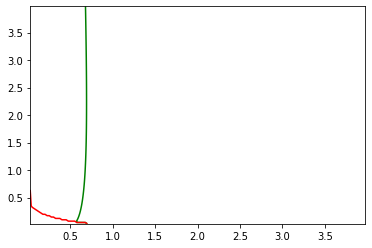

In [13]:
reactionfunction(1,4,8)

If c2a=1, c2b=1 then we can see that c1a\~=1 and c1b\~=1, therefore in the discrete case c1a=1 c1b=1.

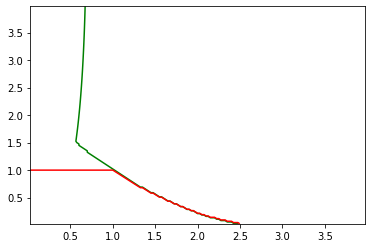

In [14]:
reactionfunction(1,1,8)

In [15]:
print(utilities([{'A': 1, 'B': 1},{'A': 1, 'B': 1}],8))
print(utilities([{'A': 2.5, 'B': 0.0000001},{'A': 1, 'B': 1}],8))

(10.0, 10.0)
(9.83, 7.16)


In [16]:
print(utilities([{'A': 0.7, 'B': 1.5},{'A': 1, 'B': 1}],8))

(9.36, 10.33)


In [17]:
matchesfromcontributions([{'A': 0.6, 'B': 1.5},{'A': 1, 'B': 1}],8)

[3.11, 4.89]

If c2a=0, c2b=4 then we can see that c1a\~=0 and c1b\~=3.3, therefore in the discrete case c1a=0 c1b=4.
The problem here is that there seems to be a continuous of solutions.

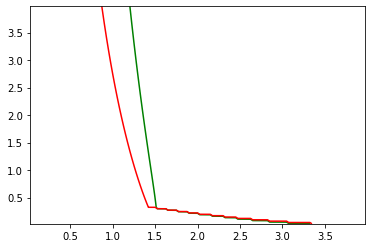

In [18]:
reactionfunction(0,4,8)

If c2a=0, c2b=1 then we can see that clearly  c1a=4 c1b=1.

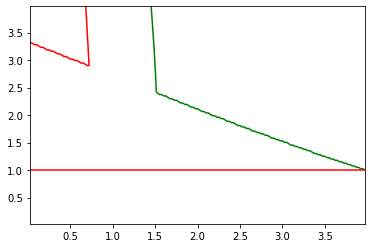

In [19]:
reactionfunction(0,1,8)

In [20]:
utilities([{'A': 4, 'B': 1},{'A': 0, 'B': 1}],8)
    

(7.0, 11.0)

In [21]:
matchesfromcontributions([{'A': 1.5, 'B': 0.4},{'A': 0, 'B': 4}],8)

[1.42, 6.58]

# Alternative implementation of equations to check if all is working OK 

In [23]:
def equationAformesh(c1a,c1b,c2a,c2b,D):
  delta=0.025
  ilist=[]
  for i in range(0,len(np.arange(0.025,4,delta))):
    jlist=[]
    for j in range(0,len(np.arange(0.025,4,delta))):
      resultA=equationA(c1a[i][j],c1b[i][j],c2a,c2b,D)
      jlist.append(resultA)
    ilist.append(jlist)
  result=np.array(ilist)
  return result

def equationBformesh(c1a,c1b,c2a,c2b,D):
  delta=0.025
  ilist=[]
  for i in range(0,len(np.arange(0.025,4,delta))):
    jlist=[]
    for j in range(0,len(np.arange(0.025,4,delta))):
      resultB=equationB(c1a[i][j],c1b[i][j],c2a,c2b,D)
      jlist.append(resultB)
    ilist.append(jlist)
  result=np.array(ilist)
  return result



In [24]:
def reactionfunction2(c2a,c2b,D):

  """Graphs the first order conditions to identify"""
  
  delta=0.025
  c1a,c1b=np.meshgrid(np.arange(0.025,4,delta),np.arange(0.025,4,delta))
  resulteqA=equationAformesh(c1a,c1b,c2a,c2b,D)
  resulteqB=equationBformesh(c1a,c1b,c2a,c2b,D)

  plt.contour(c1a,c1b,resulteqA,[0], colors='g')
  plt.contour(c1a,c1b,resulteqB,[0], colors='r')

  plt.show()

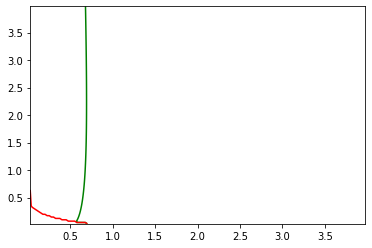

In [25]:
reactionfunction2(1,4,8)

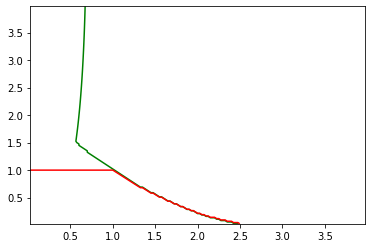

In [26]:
reactionfunction2(1,1,8)

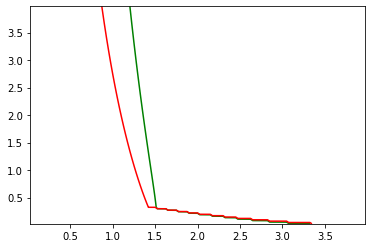

In [27]:
reactionfunction2(0,4,8)

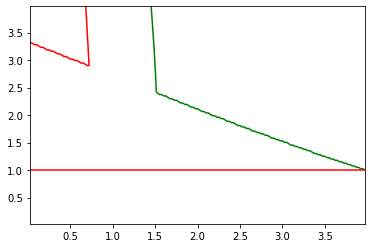

In [28]:
reactionfunction2(0,1,8)

# Case 2

In [43]:
def U1A(fa):
  return 4*(fa**0.5)
def U1B(fb):
  return 2*(fb**0.5)

def U2A(fa):
  return 4*(fa**0.5)
def U2B(fb):
  return 2*(fb**0.5)

payoffmatrix(U1A,U1B,U2A,U2B,strategies1,strategies2,8)

Payoff Matrix


,"{'A': 0, 'B': 0}","{'A': 0, 'B': 1}","{'A': 0, 'B': 4}","{'A': 1, 'B': 0}","{'A': 1, 'B': 1}","{'A': 1, 'B': 4}","{'A': 4, 'B': 0}","{'A': 4, 'B': 1}","{'A': 4, 'B': 4}"
"{'A': 0, 'B': 0}","(0.0, 0.0)","(2.0, 1.0)","(4.0, 0.0)","(4.0, 3.0)","(6.0, 4.0)","(8.0, 3.0)","(8.0, 4.0)","(10.0, 5.0)","(12.0, 4.0)"
"{'A': 0, 'B': 1}","(1.0, 2.0)","(3.0, 3.0)","(4.66, 1.66)","(5.0, 5.0)","(7.0, 6.0)","(7.94, 3.94)","(9.0, 6.0)","(11.0, 7.0)","(9.98, 2.98)"
"{'A': 0, 'B': 4}","(0.0, 4.0)","(1.66, 4.66)","(1.66, 1.66)","(4.0, 7.0)","(4.94, 6.94)","(4.23, 3.23)","(8.0, 8.0)","(6.98, 5.98)","(6.12, 2.12)"
"{'A': 1, 'B': 0}","(3.0, 4.0)","(5.0, 5.0)","(7.0, 4.0)","(7.0, 7.0)","(9.0, 8.0)","(11.0, 7.0)","(10.31, 7.31)","(11.52, 7.52)","(11.55, 4.55)"
"{'A': 1, 'B': 1}","(4.0, 6.0)","(6.0, 7.0)","(6.94, 4.94)","(8.0, 9.0)","(10.0, 10.0)","(8.98, 5.98)","(10.52, 8.52)","(10.55, 7.55)","(10.0, 4.0)"
"{'A': 1, 'B': 4}","(3.0, 8.0)","(3.94, 7.94)","(3.23, 4.23)","(7.0, 11.0)","(5.98, 8.98)","(5.12, 5.12)","(7.55, 8.55)","(7.0, 7.0)","(6.31, 3.31)"
"{'A': 4, 'B': 0}","(4.0, 8.0)","(6.0, 9.0)","(8.0, 8.0)","(7.31, 10.31)","(8.52, 10.52)","(8.55, 7.55)","(7.31, 7.31)","(8.35, 7.35)","(8.65, 4.65)"
"{'A': 4, 'B': 1}","(5.0, 10.0)","(7.0, 11.0)","(5.98, 6.98)","(7.52, 11.52)","(7.55, 10.55)","(7.0, 7.0)","(7.35, 8.35)","(7.65, 7.65)","(7.45, 4.45)"
"{'A': 4, 'B': 4}","(4.0, 12.0)","(2.98, 9.98)","(2.12, 6.12)","(4.55, 11.55)","(4.0, 10.0)","(3.31, 6.31)","(4.65, 8.65)","(4.45, 7.45)","(4.0, 4.0)"


In [42]:
publicgoodsallocationmatrix(strategies1,strategies2,8)

Public Goods Allocation Matrix [FA,FB]


,"{'A': 0, 'B': 0}","{'A': 0, 'B': 1}","{'A': 0, 'B': 4}","{'A': 1, 'B': 0}","{'A': 1, 'B': 1}","{'A': 1, 'B': 4}","{'A': 4, 'B': 0}","{'A': 4, 'B': 1}","{'A': 4, 'B': 4}"
"{'A': 0, 'B': 0}","[0.0, 0.0]","[0.0, 1.0]","[0.0, 4.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 4.0]","[4.0, 0.0]","[4.0, 1.0]","[4.0, 4.0]"
"{'A': 0, 'B': 1}","[0.0, 1.0]","[0.0, 4.0]","[0.0, 8.0]","[1.0, 1.0]","[1.0, 4.0]","[0.8, 7.2]","[4.0, 1.0]","[4.0, 4.0]","[2.46, 5.54]"
"{'A': 0, 'B': 4}","[0.0, 4.0]","[0.0, 8.0]","[0.0, 8.0]","[1.0, 4.0]","[0.8, 7.2]","[0.47, 7.53]","[4.0, 4.0]","[2.46, 5.54]","[1.6, 6.4]"
"{'A': 1, 'B': 0}","[1.0, 0.0]","[1.0, 1.0]","[1.0, 4.0]","[4.0, 0.0]","[4.0, 1.0]","[4.0, 4.0]","[8.0, 0.0]","[7.2, 0.8]","[5.54, 2.46]"
"{'A': 1, 'B': 1}","[1.0, 1.0]","[1.0, 4.0]","[0.8, 7.2]","[4.0, 1.0]","[4.0, 4.0]","[2.46, 5.54]","[7.2, 0.8]","[5.54, 2.46]","[4.0, 4.0]"
"{'A': 1, 'B': 4}","[1.0, 4.0]","[0.8, 7.2]","[0.47, 7.53]","[4.0, 4.0]","[2.46, 5.54]","[1.6, 6.4]","[5.54, 2.46]","[4.0, 4.0]","[2.88, 5.12]"
"{'A': 4, 'B': 0}","[4.0, 0.0]","[4.0, 1.0]","[4.0, 4.0]","[8.0, 0.0]","[7.2, 0.8]","[5.54, 2.46]","[8.0, 0.0]","[7.53, 0.47]","[6.4, 1.6]"
"{'A': 4, 'B': 1}","[4.0, 1.0]","[4.0, 4.0]","[2.46, 5.54]","[7.2, 0.8]","[5.54, 2.46]","[4.0, 4.0]","[7.53, 0.47]","[6.4, 1.6]","[5.12, 2.88]"
"{'A': 4, 'B': 4}","[4.0, 4.0]","[2.46, 5.54]","[1.6, 6.4]","[5.54, 2.46]","[4.0, 4.0]","[2.88, 5.12]","[6.4, 1.6]","[5.12, 2.88]","[4.0, 4.0]"


In [44]:
strategies1=[]
strategies2=[]
for i in [0,1.5,3,4]:
  for j in [0,1.5,3,4]:
    #print(i,j)
    strategies1.append({'A':i,'B':j})
    strategies2.append({'A':i,'B':j})
strategies1
strategies2

[{'A': 0, 'B': 0},
 {'A': 0, 'B': 1.5},
 {'A': 0, 'B': 3},
 {'A': 0, 'B': 4},
 {'A': 1.5, 'B': 0},
 {'A': 1.5, 'B': 1.5},
 {'A': 1.5, 'B': 3},
 {'A': 1.5, 'B': 4},
 {'A': 3, 'B': 0},
 {'A': 3, 'B': 1.5},
 {'A': 3, 'B': 3},
 {'A': 3, 'B': 4},
 {'A': 4, 'B': 0},
 {'A': 4, 'B': 1.5},
 {'A': 4, 'B': 3},
 {'A': 4, 'B': 4}]

In [45]:
# Caso para que funcione asimetrico 1.5 y 3 con D=18
payoffmatrix(U1A,U1B,U2A,U2B,strategies1,strategies2,18)

Payoff Matrix


,"{'A': 0, 'B': 0}","{'A': 0, 'B': 1.5}","{'A': 0, 'B': 3}","{'A': 0, 'B': 4}","{'A': 1.5, 'B': 0}","{'A': 1.5, 'B': 1.5}","{'A': 1.5, 'B': 3}","{'A': 1.5, 'B': 4}","{'A': 3, 'B': 0}","{'A': 3, 'B': 1.5}","{'A': 3, 'B': 3}","{'A': 3, 'B': 4}","{'A': 4, 'B': 0}","{'A': 4, 'B': 1.5}","{'A': 4, 'B': 3}","{'A': 4, 'B': 4}"
"{'A': 0, 'B': 0}","(0.0, 0.0)","(2.45, 0.95)","(3.46, 0.46)","(4.0, 0.0)","(4.9, 3.4)","(7.35, 4.35)","(8.36, 3.86)","(8.9, 3.4)","(6.93, 3.93)","(9.38, 4.88)","(10.39, 4.39)","(10.93, 3.93)","(8.0, 4.0)","(10.45, 4.95)","(11.46, 4.46)","(12.0, 4.0)"
"{'A': 0, 'B': 1.5}","(0.95, 2.45)","(3.4, 3.4)","(4.41, 2.91)","(4.95, 2.45)","(5.85, 5.85)","(8.3, 6.8)","(9.31, 6.31)","(9.85, 5.85)","(7.88, 6.38)","(10.33, 7.33)","(11.34, 6.84)","(11.88, 6.38)","(8.95, 6.45)","(11.4, 7.4)","(12.41, 6.91)","(12.95, 6.45)"
"{'A': 0, 'B': 3}","(0.46, 3.46)","(2.91, 4.41)","(3.93, 3.93)","(4.46, 3.46)","(5.36, 6.86)","(7.81, 7.81)","(8.83, 7.33)","(9.36, 6.86)","(7.39, 7.39)","(9.84, 8.34)","(10.86, 7.86)","(11.39, 7.39)","(8.46, 7.46)","(10.91, 8.41)","(11.93, 7.93)","(12.46, 7.46)"
"{'A': 0, 'B': 4}","(0.0, 4.0)","(2.45, 4.95)","(3.46, 4.46)","(4.0, 4.0)","(4.9, 7.4)","(7.35, 8.35)","(8.36, 7.86)","(8.9, 7.4)","(6.93, 7.93)","(9.38, 8.88)","(10.39, 8.39)","(10.53, 7.53)","(8.0, 8.0)","(10.45, 8.95)","(11.46, 8.46)","(11.18, 7.18)"
"{'A': 1.5, 'B': 0}","(3.4, 4.9)","(5.85, 5.85)","(6.86, 5.36)","(7.4, 4.9)","(8.3, 8.3)","(10.75, 9.25)","(11.76, 8.76)","(12.3, 8.3)","(10.33, 8.83)","(12.78, 9.78)","(13.79, 9.29)","(14.33, 8.83)","(11.4, 8.9)","(13.85, 9.85)","(14.86, 9.36)","(15.4, 8.9)"
"{'A': 1.5, 'B': 1.5}","(4.35, 7.35)","(6.8, 8.3)","(7.81, 7.81)","(8.35, 7.35)","(9.25, 10.75)","(11.7, 11.7)","(12.71, 11.21)","(13.25, 10.75)","(11.28, 11.28)","(13.73, 12.23)","(14.74, 11.74)","(14.72, 10.72)","(12.35, 11.35)","(14.8, 12.3)","(15.24, 11.24)","(15.0, 10.0)"
"{'A': 1.5, 'B': 3}","(3.86, 8.36)","(6.31, 9.31)","(7.33, 8.83)","(7.86, 8.36)","(8.76, 11.76)","(11.21, 12.71)","(12.23, 12.23)","(11.91, 10.91)","(10.79, 12.29)","(13.24, 13.24)","(12.97, 11.47)","(12.69, 10.19)","(11.86, 12.36)","(13.74, 12.74)","(13.28, 10.78)","(13.01, 9.51)"
"{'A': 1.5, 'B': 4}","(3.4, 8.9)","(5.85, 9.85)","(6.86, 9.36)","(7.4, 8.9)","(8.3, 12.3)","(10.75, 13.25)","(10.91, 11.91)","(10.6, 10.6)","(10.33, 12.83)","(12.22, 13.22)","(11.69, 11.19)","(11.41, 9.91)","(11.4, 12.9)","(12.5, 12.5)","(12.01, 10.51)","(11.76, 9.26)"
"{'A': 3, 'B': 0}","(3.93, 6.93)","(6.38, 7.88)","(7.39, 7.39)","(7.93, 6.93)","(8.83, 10.33)","(11.28, 11.28)","(12.29, 10.79)","(12.83, 10.33)","(10.86, 10.86)","(13.31, 11.81)","(14.32, 11.32)","(14.86, 10.86)","(11.93, 10.93)","(14.38, 11.88)","(15.39, 11.39)","(15.93, 10.93)"
"{'A': 3, 'B': 1.5}","(4.88, 9.38)","(7.33, 10.33)","(8.34, 9.84)","(8.88, 9.38)","(9.78, 12.78)","(12.23, 13.73)","(13.24, 13.24)","(13.22, 12.22)","(11.81, 13.31)","(14.26, 14.26)","(13.92, 12.42)","(13.7, 11.2)","(12.88, 13.38)","(14.34, 13.34)","(14.07, 11.57)","(13.89, 10.39)"


In [46]:
publicgoodsallocationmatrix(strategies1,strategies2,18)

Public Goods Allocation Matrix [FA,FB]


,"{'A': 0, 'B': 0}","{'A': 0, 'B': 1.5}","{'A': 0, 'B': 3}","{'A': 0, 'B': 4}","{'A': 1.5, 'B': 0}","{'A': 1.5, 'B': 1.5}","{'A': 1.5, 'B': 3}","{'A': 1.5, 'B': 4}","{'A': 3, 'B': 0}","{'A': 3, 'B': 1.5}","{'A': 3, 'B': 3}","{'A': 3, 'B': 4}","{'A': 4, 'B': 0}","{'A': 4, 'B': 1.5}","{'A': 4, 'B': 3}","{'A': 4, 'B': 4}"
"{'A': 0, 'B': 0}","[0.0, 0.0]","[0.0, 1.4999999999999998]","[0.0, 2.9999999999999996]","[0.0, 4.0]","[1.4999999999999998, 0.0]","[1.4999999999999998, 1.4999999999999998]","[1.4999999999999998, 2.9999999999999996]","[1.4999999999999998, 4.0]","[2.9999999999999996, 0.0]","[2.9999999999999996, 1.4999999999999998]","[2.9999999999999996, 2.9999999999999996]","[2.9999999999999996, 4.0]","[4.0, 0.0]","[4.0, 1.4999999999999998]","[4.0, 2.9999999999999996]","[4.0, 4.0]"
"{'A': 0, 'B': 1.5}","[0.0, 1.4999999999999998]","[0.0, 5.999999999999999]","[0.0, 8.742640687119284]","[0.0, 10.398979485566356]","[1.4999999999999998, 1.4999999999999998]","[1.4999999999999998, 5.999999999999999]","[1.4999999999999998, 8.742640687119284]","[1.4999999999999998, 10.398979485566356]","[2.9999999999999996, 1.4999999999999998]","[2.9999999999999996, 5.999999999999999]","[2.9999999999999996, 8.742640687119284]","[2.9999999999999996, 10.398979485566356]","[4.0, 1.4999999999999998]","[4.0, 5.999999999999999]","[4.0, 8.742640687119284]","[4.0, 10.398979485566356]"
"{'A': 0, 'B': 3}","[0.0, 2.9999999999999996]","[0.0, 8.742640687119284]","[0.0, 11.999999999999998]","[0.0, 13.928203230275509]","[1.4999999999999998, 2.9999999999999996]","[1.4999999999999998, 8.742640687119284]","[1.4999999999999998, 11.999999999999998]","[1.4999999999999998, 13.928203230275509]","[2.9999999999999996, 2.9999999999999996]","[2.9999999999999996, 8.742640687119284]","[2.9999999999999996, 11.999999999999998]","[2.9999999999999996, 13.928203230275509]","[4.0, 2.9999999999999996]","[4.0, 8.742640687119284]","[4.0, 11.999999999999998]","[4.0, 13.928203230275509]"
"{'A': 0, 'B': 4}","[0.0, 4.0]","[0.0, 10.398979485566356]","[0.0, 13.928203230275509]","[0.0, 16.0]","[1.4999999999999998, 4.0]","[1.4999999999999998, 10.398979485566356]","[1.4999999999999998, 13.928203230275509]","[1.4999999999999998, 16.0]","[2.9999999999999996, 4.0]","[2.9999999999999996, 10.398979485566356]","[2.9999999999999996, 13.928203230275509]","[2.84, 15.16]","[4.0, 4.0]","[4.0, 10.398979485566356]","[4.0, 13.928203230275509]","[3.6, 14.4]"
"{'A': 1.5, 'B': 0}","[1.4999999999999998, 0.0]","[1.4999999999999998, 1.4999999999999998]","[1.4999999999999998, 2.9999999999999996]","[1.4999999999999998, 4.0]","[5.999999999999999, 0.0]","[5.999999999999999, 1.4999999999999998]","[5.999999999999999, 2.9999999999999996]","[5.999999999999999, 4.0]","[8.742640687119284, 0.0]","[8.742640687119284, 1.4999999999999998]","[8.742640687119284, 2.9999999999999996]","[8.742640687119284, 4.0]","[10.398979485566356, 0.0]","[10.398979485566356, 1.4999999999999998]","[10.398979485566356, 2.9999999999999996]","[10.398979485566356, 4.0]"
"{'A': 1.5, 'B': 1.5}","[1.4999999999999998, 1.4999999999999998]","[1.4999999999999998, 5.999999999999999]","[1.4999999999999998, 8.742640687119284]","[1.4999999999999998, 10.398979485566356]","[5.999999999999999, 1.4999999999999998]","[5.999999999999999, 5.999999999999999]","[5.999999999999999, 8.742640687119284]","[5.999999999999999, 10.398979485566356]","[8.742640687119284, 1.4999999999999998]","[8.742640687119284, 5.999999999999999]","[8.742640687119284, 8.742640687119284]","[8.22, 9.78]","[10.398979485566356, 1.4999999999999998]","[10.398979485566356, 5.999999999999999]","[9.78, 8.22]","[9.0, 9.0]"
"{'A': 1.5, 'B': 3}","[1.4999999999999998, 2.9999999999999996]","[1.4999999999999998, 8.742640687119284]","[1.4999999999999998, 11.999999999999998]","[1.4999999999999998, 13.928203230275509]","[5.999999999999999, 2.9999999999999996]","[5.999999999999999, 8.742640687119284]","[5.999999999999999, 11.999999999999998]","[5.42, 12.58]","[8.742640687119284, 2.9999999999999996]","[8.742640687119284, 8.